# Hazardous Asteroid Classification

## Author: Spriha Ghosh

![ChessUrl](https://scitechdaily.com/images/Interstellar-Asteroids.gif "chess")

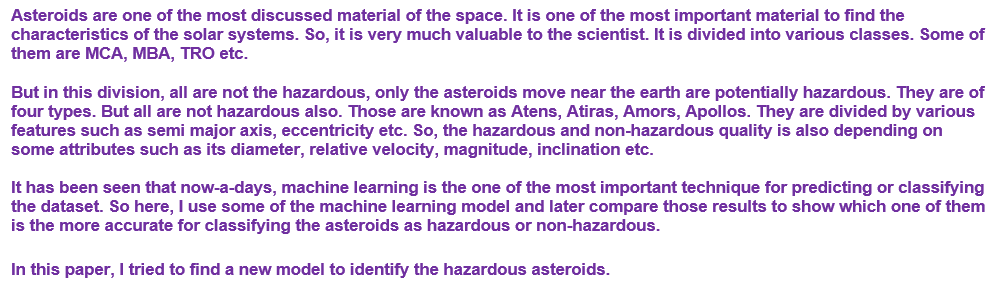

# Import libraries and Load the dataset

In [44]:
# Programming
import pandas as pd
import numpy as np
import time

# Machine Learning | sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score, precision_score, classification_report

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Other
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
SEED = 42

In [13]:
df = pd.read_csv('../input/nasa-asteroids-classification/nasa.csv',
                 parse_dates=['Close Approach Date', 'Orbit Determination Date', 'Epoch Date Close Approach'])

# Exploratory Data Analysis

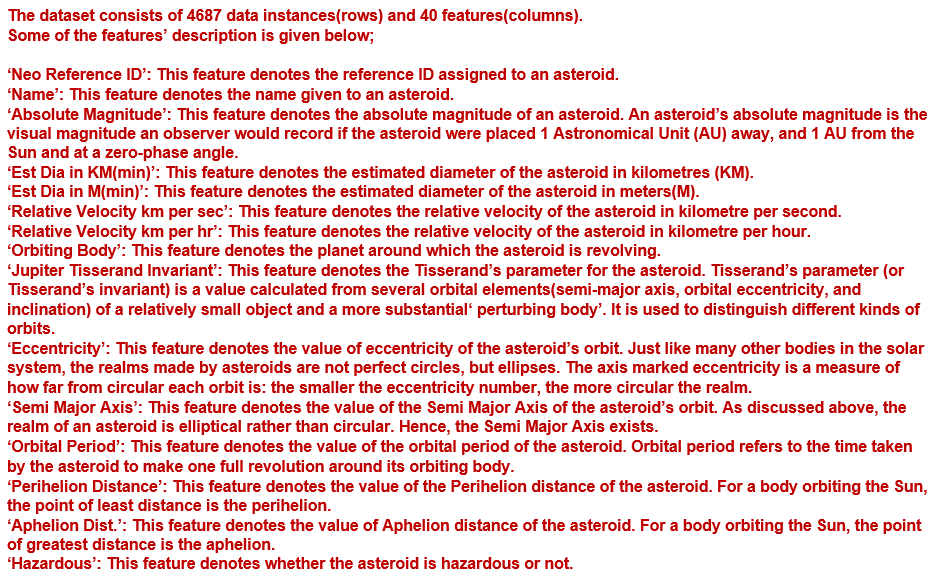

In [14]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Neo Reference ID              4687 non-null   int64         
 1   Name                          4687 non-null   int64         
 2   Absolute Magnitude            4687 non-null   float64       
 3   Est Dia in KM(min)            4687 non-null   float64       
 4   Est Dia in KM(max)            4687 non-null   float64       
 5   Est Dia in M(min)             4687 non-null   float64       
 6   Est Dia in M(max)             4687 non-null   float64       
 7   Est Dia in Miles(min)         4687 non-null   float64       
 8   Est Dia in Miles(max)         4687 non-null   float64       
 9   Est Dia in Feet(min)          4687 non-null   float64       
 10  Est Dia in Feet(max)          4687 non-null   float64       
 11  Close Approach Date           

In [16]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [17]:
(print(df.shape))

(4687, 40)


## Dimensionality Reduction

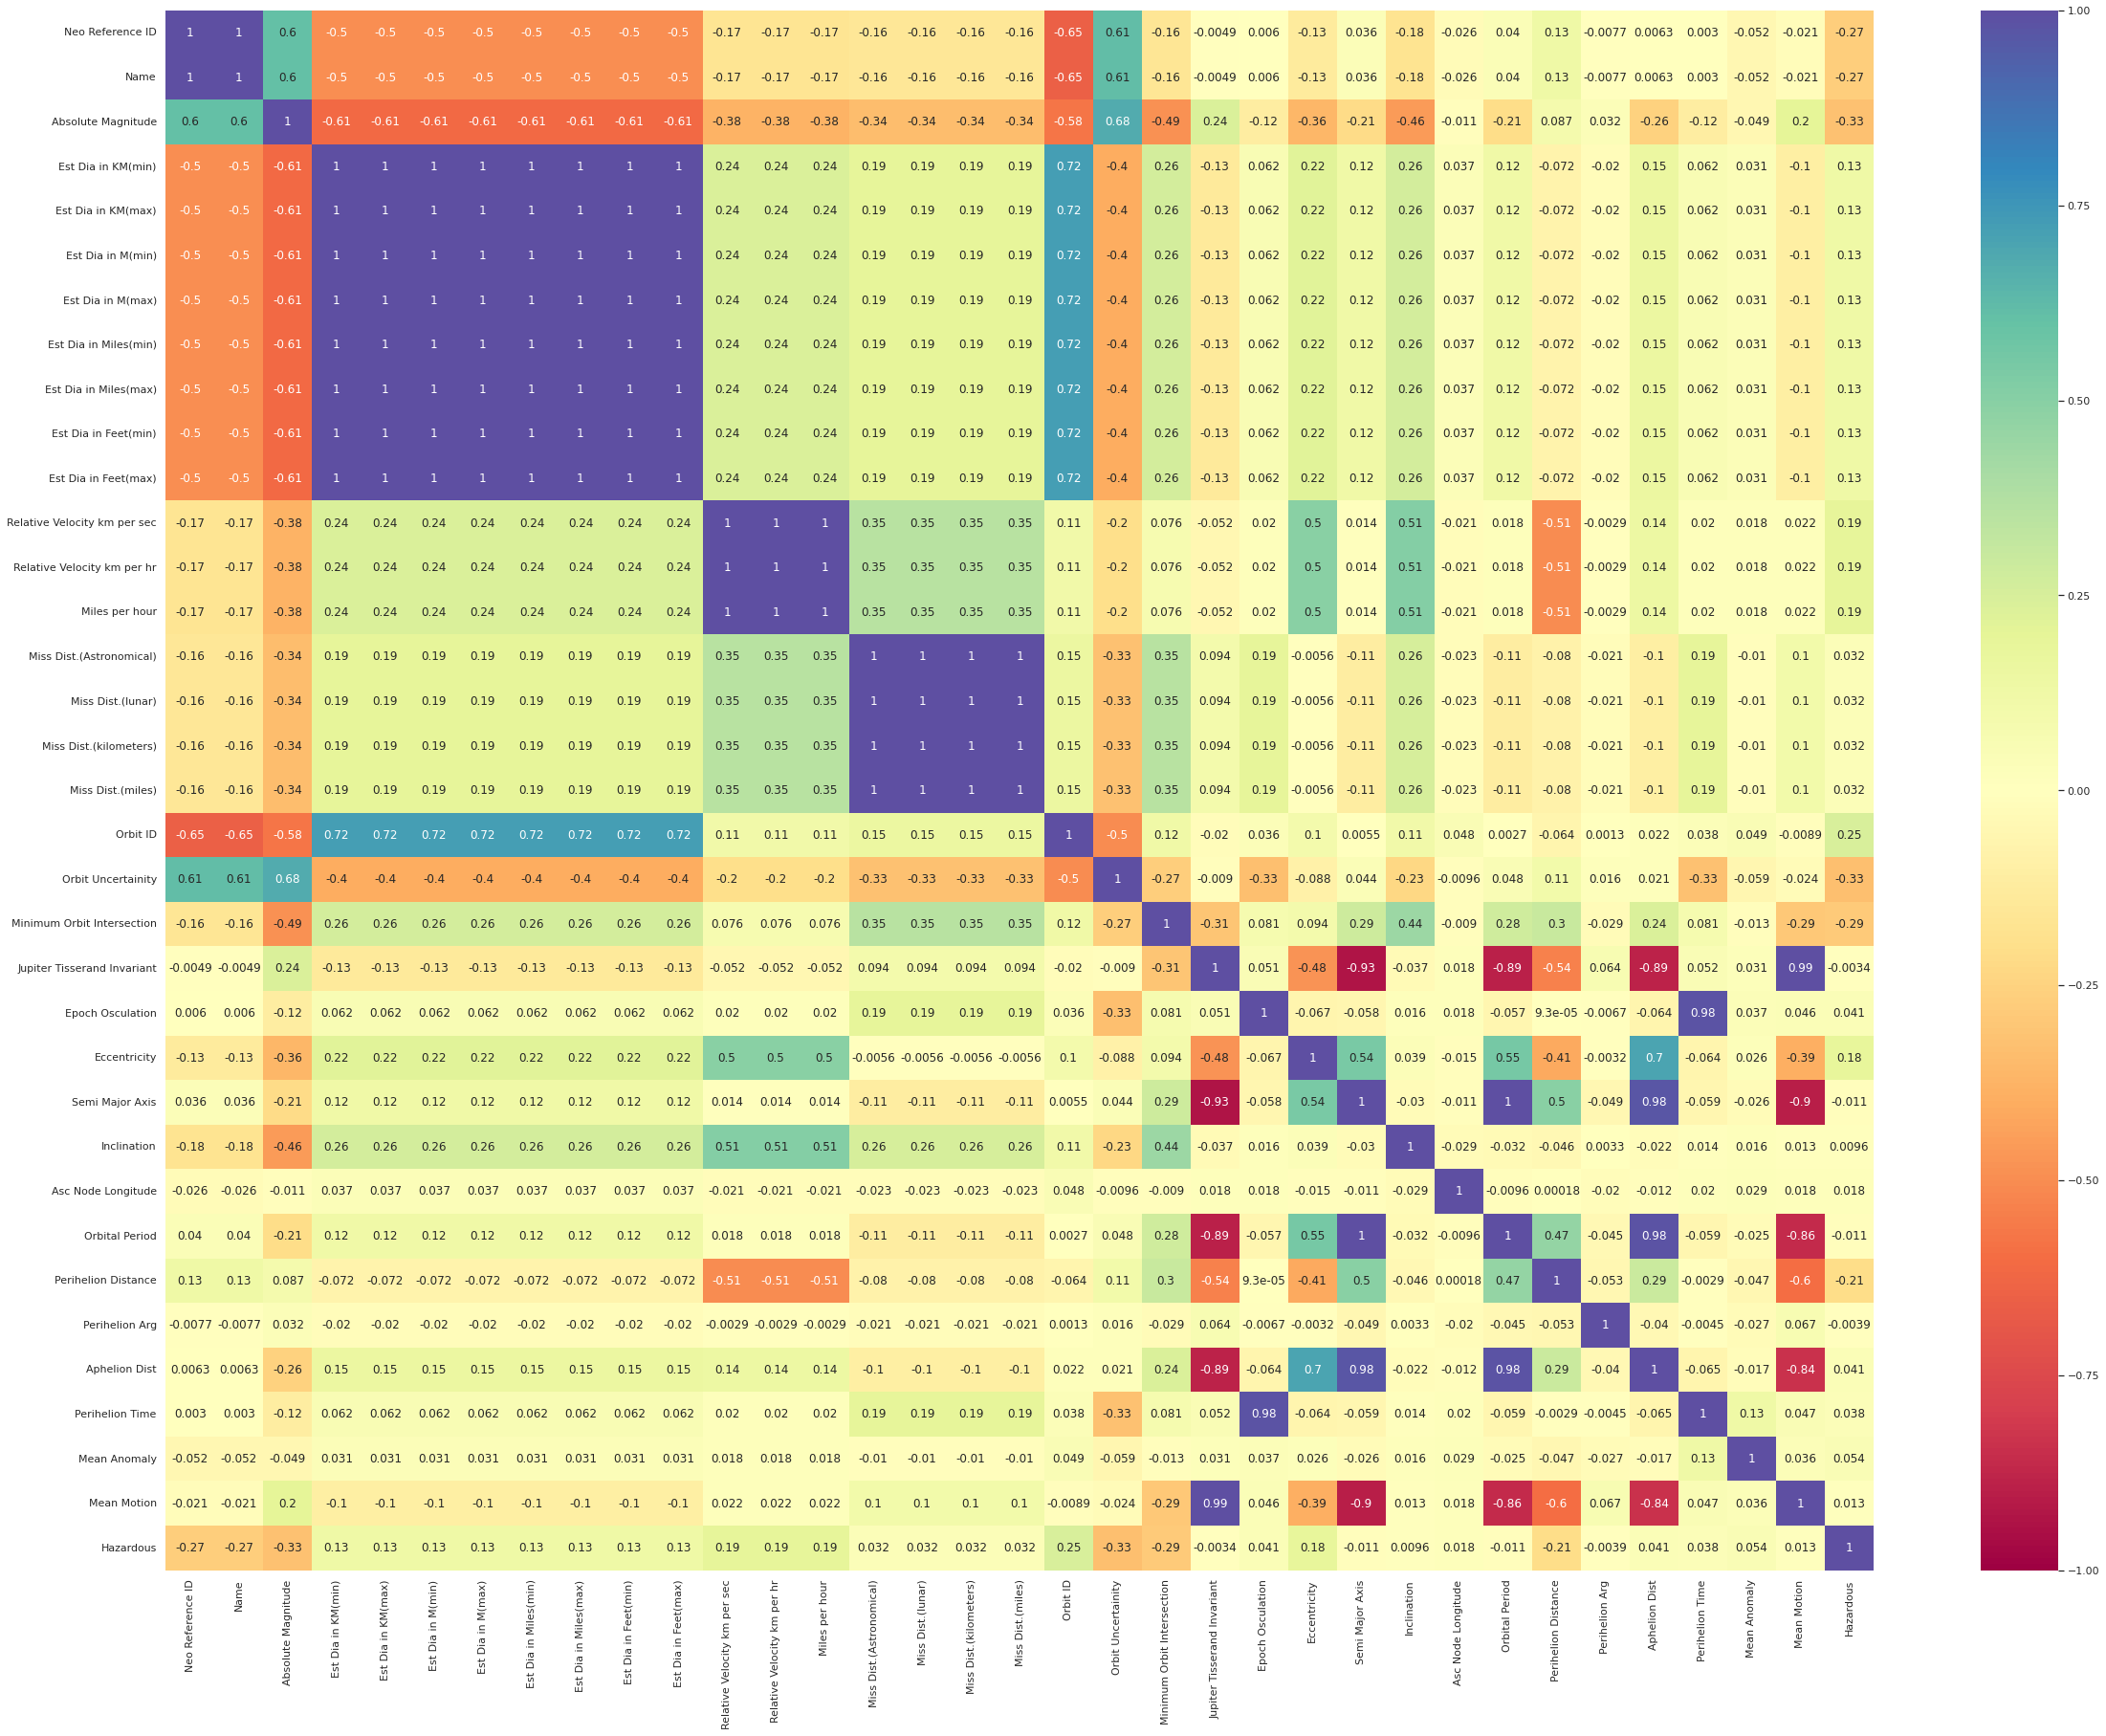

In [18]:
# Checking visually for feature correlation
sns.set(rc={'figure.figsize':(40,30)})
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="Spectral", annot=True)
plt.show()

In [19]:
# Dropping completely correlated features and datetime features
df = df.drop(['Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Est Dia in KM(max)',
              'Relative Velocity km per hr', 'Miles per hour',
              'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)',
              'Semi Major Axis',
              'Neo Reference ID', 'Name',
              'Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date'],axis=1)

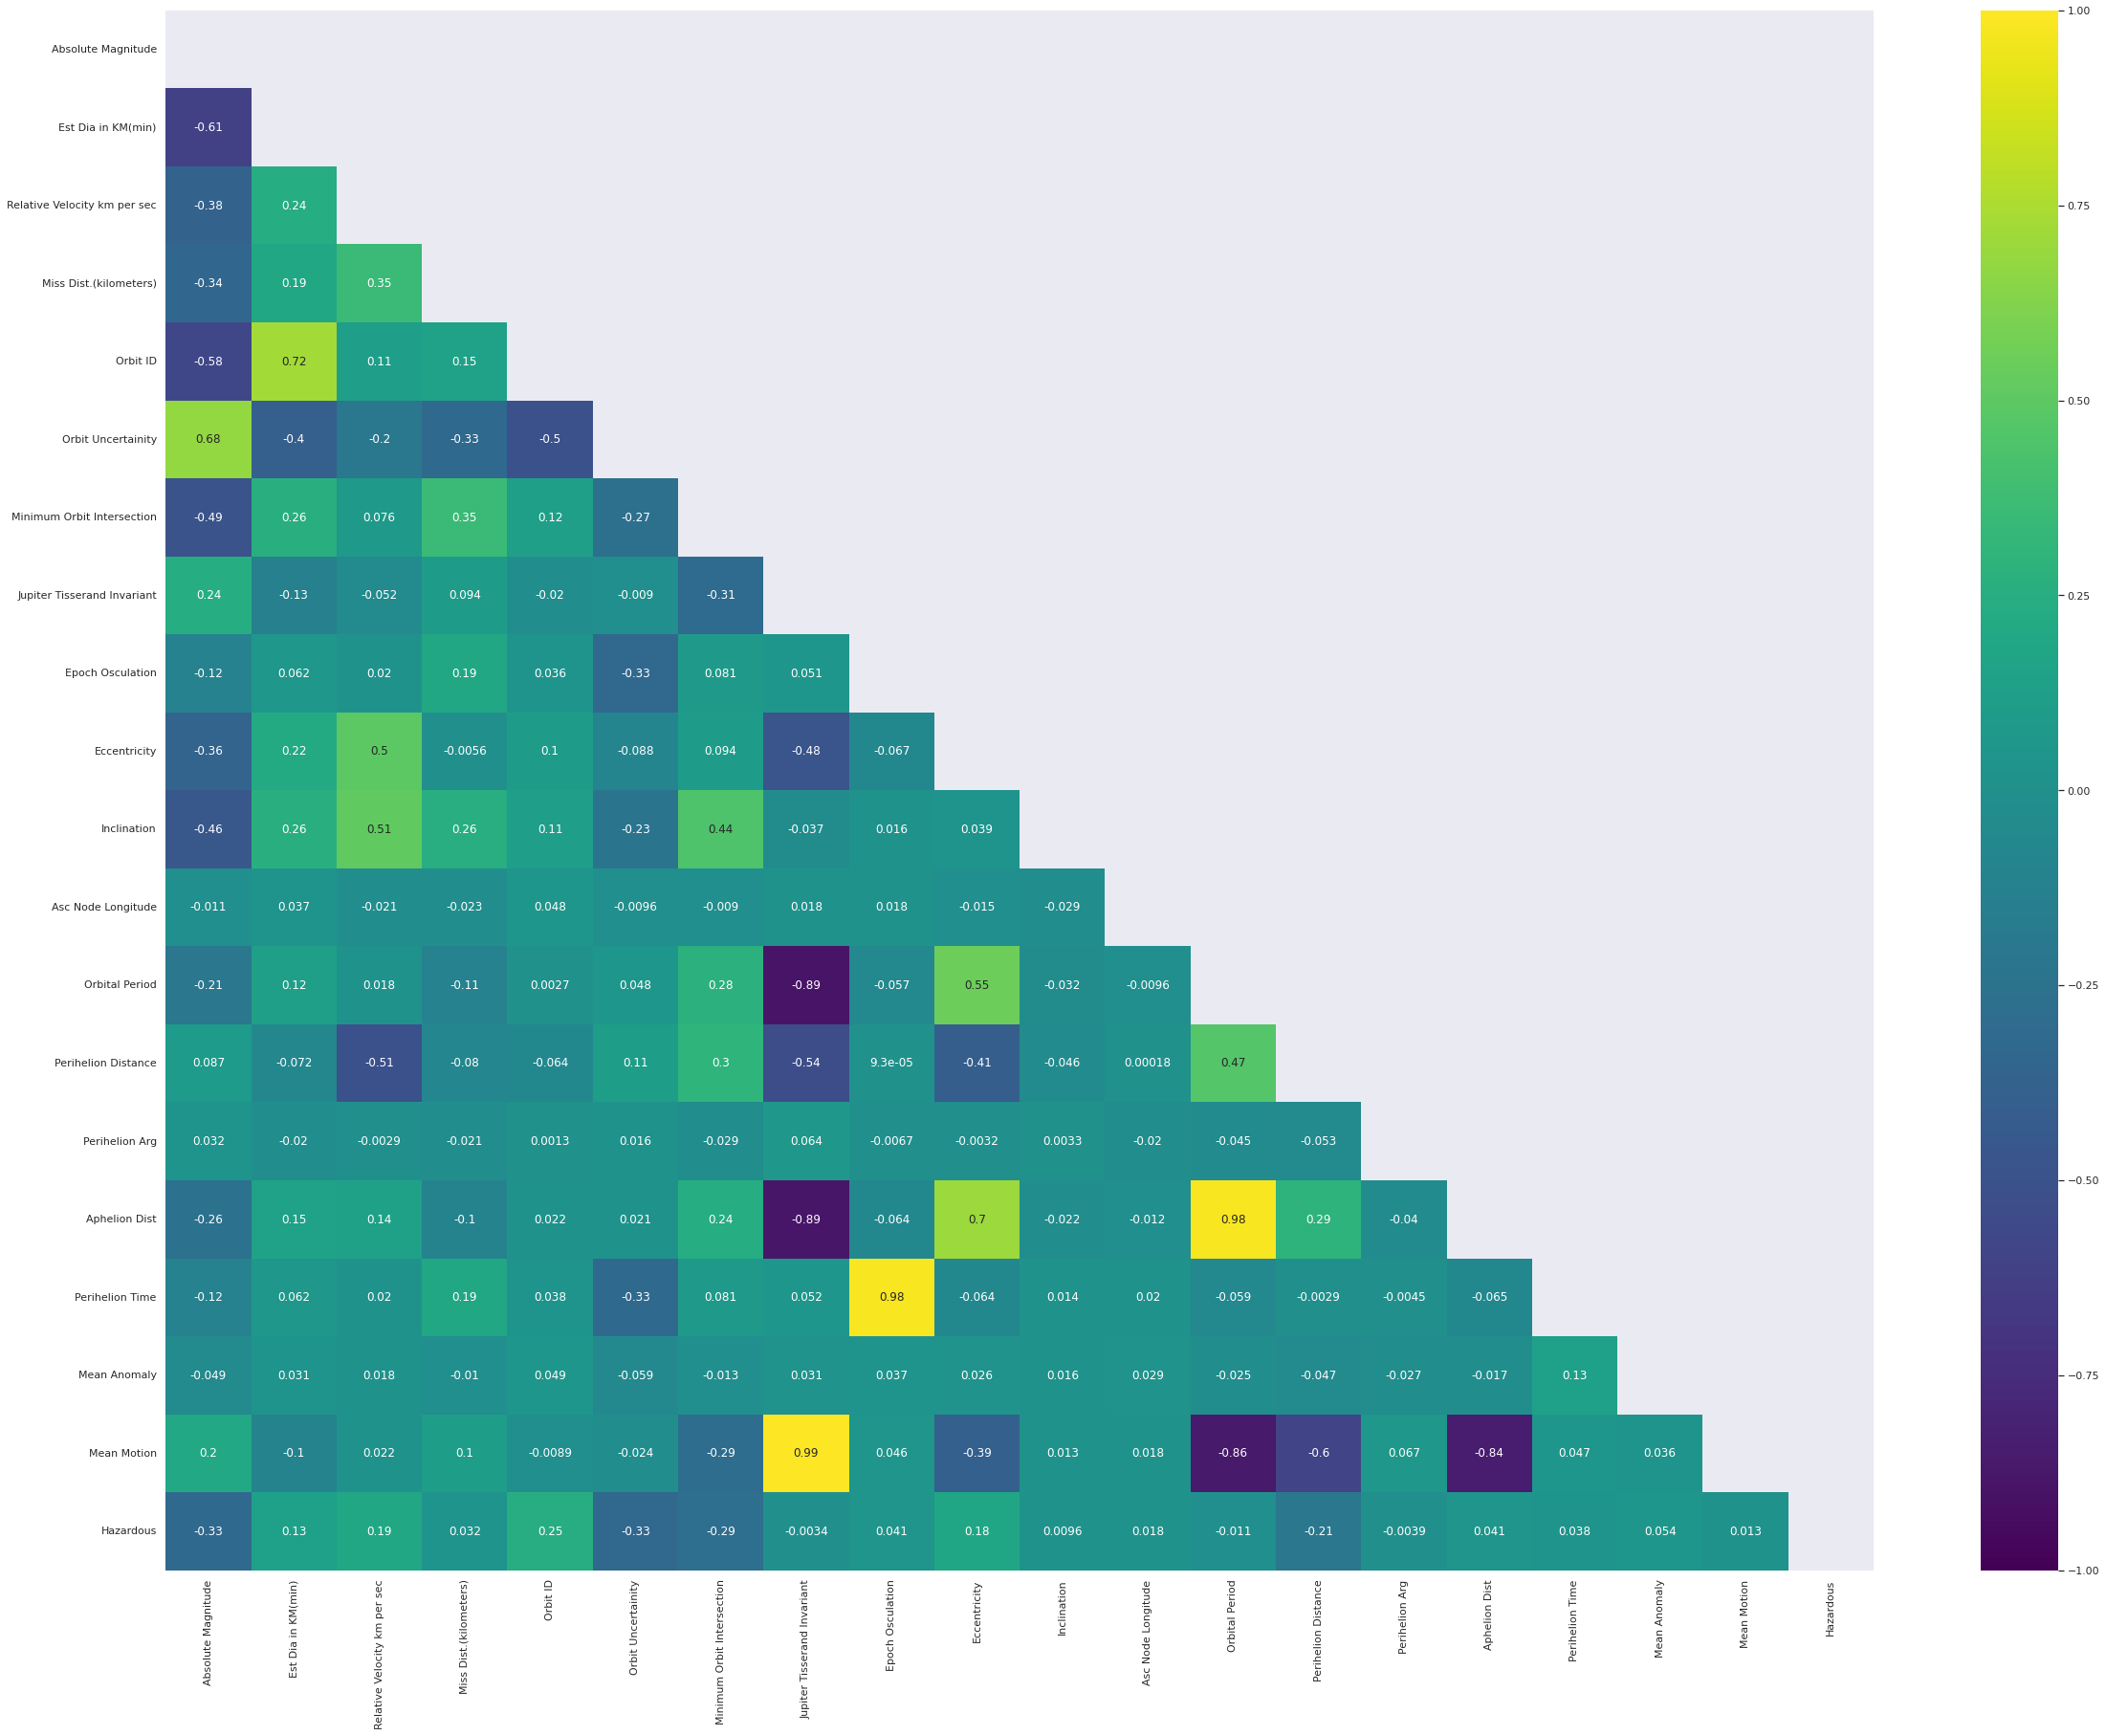

In [20]:
mask = np.triu(df.corr())

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="viridis", mask = mask, annot=True)
plt.show()
plt.close()

## Categorical Feature Encoding

In [21]:
encoder = LabelEncoder()

df['hazardous'] = encoder.fit_transform(df.Hazardous)

# Dropping these categorical features since they are repeated among all observations
df = df.drop(['Orbiting Body', 'Equinox', 'Hazardous'], axis = 1)

In [25]:
data = df.values
X, y = data[:,:-1], data[:,-1]
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable 
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0.0: 3932, 1.0: 755})
Resample dataset shape Counter({1.0: 3932, 0.0: 3932})


# Classification Models

**It is a case of an imbalanced dataset. We have a class which is dominating the other in terms of the number of data entries.
o, we can not merely rely on accuracy to evaluate a machine learning classifier trained on this dataset.**

**Let us divide the dataset into an 80:20 ratio as training and test set respectively. The train set(generated as per my code) contains 3749 data instances and has 610 cases labelled as 1(hazardous), which means that if a model predicts all values as 0, then the accuracy will be 83.72%. This will be considered as baseline accuracy for the train set.**

**Our model should do better than these accuracies or should be robust enough to deal with the class imbalance.**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.20, random_state=0)  # splitting in the ratio 80:20

In [37]:
def train_model(model,X_train, y_train, X_test,y_test):
    
    start_time = time.time()
    model.fit(X_train, y_train)
    
    delta_time = (time.time() - start_time)
    y_predict = model.predict(X_test)
    acc_model = accuracy_score(y_test, y_predict)
    prec_model = precision_score(y_test, y_predict,average= None)
    recall_model = recall_score(y_test, y_predict,average= None)
    log = np.array([[acc_model,prec_model[0],prec_model[1],recall_model[0],recall_model[1],delta_time]])
    
    print("training time: {0}".format(delta_time))
    print("accuracy: {0}".format(acc_model))
    print("\nconfusion matrix: ")
    print("-----------------------")
    print(confusion_matrix(y_test, y_predict))
    target_names = ['Not hazardous', 'Hazardous']
    print("\nclassification report:")
    print("-----------------------")
    print(classification_report(y_test, y_predict,target_names=target_names))
       
    return model, log

# Interpreting Metrics

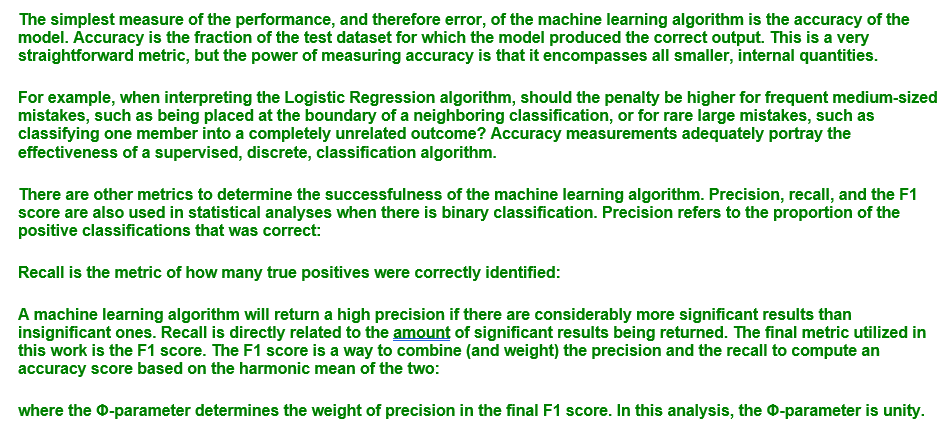
    

# Logistic Regression

In [38]:
#Train and test the logistic regression classifier
Log_reg_model = linear_model.LogisticRegression(C=0.001, solver='lbfgs', multi_class='auto')
Log_reg_model, model_log = (train_model(Log_reg_model,X_train, y_train, X_test,y_test))

training time: 0.02671527862548828
accuracy: 0.5263827082008901

confusion matrix: 
-----------------------
[[408 367]
 [378 420]]

classification report:
-----------------------
               precision    recall  f1-score   support

Not hazardous       0.52      0.53      0.52       775
    Hazardous       0.53      0.53      0.53       798

     accuracy                           0.53      1573
    macro avg       0.53      0.53      0.53      1573
 weighted avg       0.53      0.53      0.53      1573



# Support Vector Machine

In [41]:
# Train a Support Vector Machine
from sklearn.svm import SVC

parameters = {'C' : [8,9, 10, 11, 12,13, 14], 
              'kernel' : ['linear', 'rbf'],
              'degree': [1],
              'gamma': (0.01, 0.1,1)}
             
#SVC_model = GridSearchCV(estimator = SVC(), 
#                           param_grid = parameters,
#                           scoring = 'accuracy',
#                           cv = 6,
#                           n_jobs = -1)

SVC_model= SVC(C=20, degree=3, gamma='auto', kernel='rbf')

SVC_model,log = train_model(SVC_model,X_train, y_train, X_test,y_test)
model_log= np.append(model_log,log,axis=0)

training time: 1.6102116107940674
accuracy: 0.989192625556262

confusion matrix: 
-----------------------
[[775   0]
 [ 17 781]]

classification report:
-----------------------
               precision    recall  f1-score   support

Not hazardous       0.98      1.00      0.99       775
    Hazardous       1.00      0.98      0.99       798

     accuracy                           0.99      1573
    macro avg       0.99      0.99      0.99      1573
 weighted avg       0.99      0.99      0.99      1573



# Random Forest Classifier

In [40]:
# Train a Random Forest Classifier
number_of_trees = 1000
max_number_of_features = 15

RFC_model = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features)

RFC_model,log = train_model(RFC_model,X_train, y_train, X_test,y_test)
model_log= np.append(model_log,log,axis=0)

training time: 16.569557905197144
accuracy: 0.9993642720915448

confusion matrix: 
-----------------------
[[774   1]
 [  0 798]]

classification report:
-----------------------
               precision    recall  f1-score   support

Not hazardous       1.00      1.00      1.00       775
    Hazardous       1.00      1.00      1.00       798

     accuracy                           1.00      1573
    macro avg       1.00      1.00      1.00      1573
 weighted avg       1.00      1.00      1.00      1573



# All the models have over 99% accuracy